In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import os

%matplotlib inline

In [14]:
pwd

'/media/dhanushkaw/My Passport/Andrew_Edwards_simulations/Analysis_scripts'

Install MDAnalysis to use pzc package

In [15]:
# Include folder where peptide_z_com.py script is located
sys.path.insert(0,os.path.abspath('Peptide_z_COM_calculator/'))
import peptide_z_com as pzc

In [16]:
# Location of tpr and trajectory - make sure trajectory has been processed to remove jumps (can do with GMX)
structure="../Membrane_proteins/10LPS_3LacY_position1_10PMB1s/Trajectories_and_tprs/No_solvent_CAs.tpr"
trajectory="../Membrane_proteins/10LPS_3LacY_position1_10PMB1s/Trajectories_and_tprs/No_solvent_CAs.xtc"

# MDAnalysis selection of peptides and lipid headgroups
PMB1s_sel='resname PMB1'
Phosphate_sel='name PO1 PO2 PO4'


Initialise COM class from Python module with following arguments:
- tpr 
- traj
- phosphates - selection of lipid headgroups for identifying upper and lower leaflets using MDA Leaflet Finder
- sel - selection for COM calculation, typically a group of lipids or peptides
- subdivision - how to subdivide the selection e.g. by residue or by fragment (may want to change to "residues")
- start - set to 0 by default
- stop - set to -1 by default
- step - set to 1 by default


In [ ]:
PMB1_COM=pzc.COM(tpr=structure,traj=trajectory,phosphates=Phosphate_sel,sel=PMB1s_sel,subdivision="residues")
Time,Phosphate_total,PMB1_COM_total=PMB1_COM.COM_calculator()

  0%|          | 0/50000 [00:00<?, ?it/s]

# Plotting and saving z positions

(0.0, 160.0)

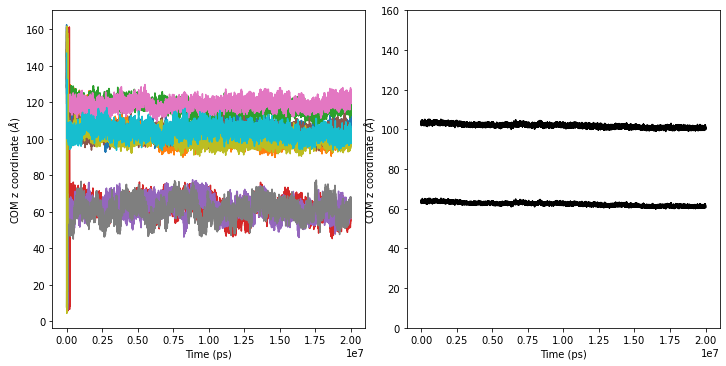

In [5]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(10,5))
plt.tight_layout()

# Used 10 here as we have 10 peptides - modify as appropriate
for i in range(10):
    ax[0].plot(Time,np.array(PMB1_COM_total)[i,:,2])
    #Add in folder name, and prefix as you want - will save time vs z position for each peptide
    np.savetxt(f"PMB1_{i}.dat",(np.array(Time),np.array(PMB1_COM_total)[i,:,2]))

for i in range(2):
    ax[1].plot(Time,np.array(Phosphate_total[:,i,0,2]),color='black')
    np.savetxt(f"Leaflet_{i}.dat",(np.array(Time),np.array(Phosphate_total)[:,i,0,2]))

ax[0].set_xlabel("Time (ps)")
ax[0].set_ylabel("COM z coordinate ($\AA$)")

ax[1].set_xlabel("Time (ps)")
ax[1].set_ylabel("COM z coordinate ($\AA$)")
ax[1].set_ylim(bottom=0,top=160)